In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [11]:
df = pd.read_csv('diabetes (2).csv')

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
# 2.	Check for missing values.
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [15]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

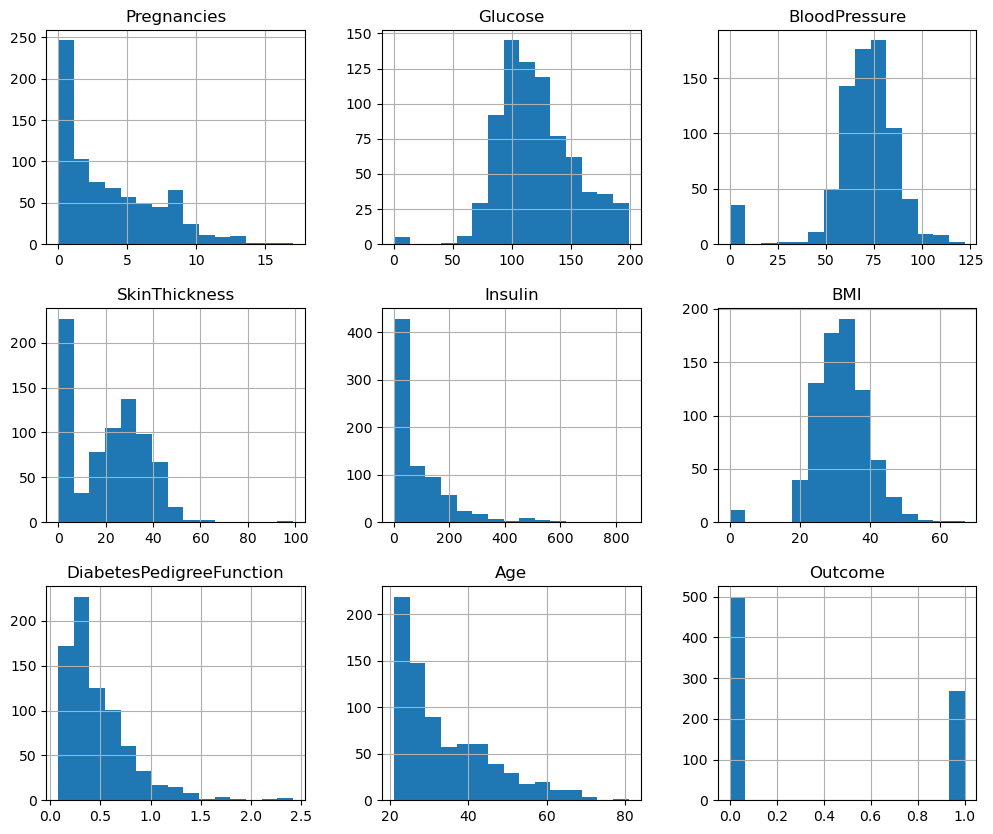

In [16]:
# 3.	Explore data distributions using histograms and box plots.

df.hist(figsize=(12,10), bins=15)
plt.show()

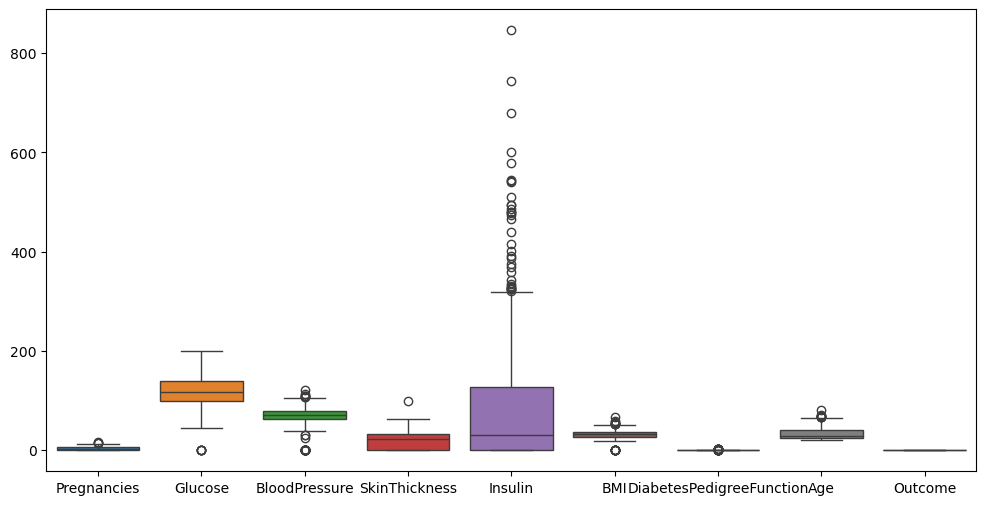

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.show()

In [21]:
# 4.	Visualize relationships between features and survival using scatter plots and bar plots


print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


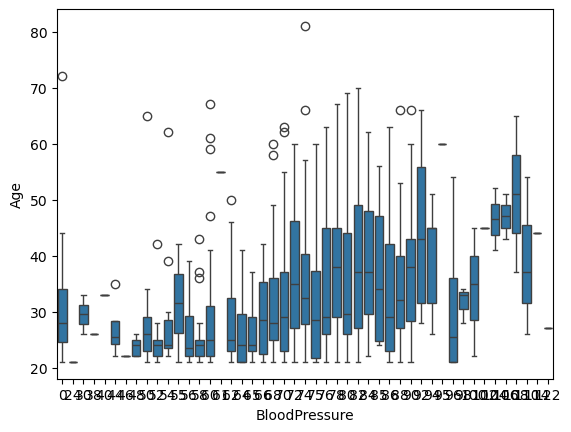

In [26]:
# Age vs Survival
sns.boxplot(x="BloodPressure", y="Age", data=df)
plt.show()

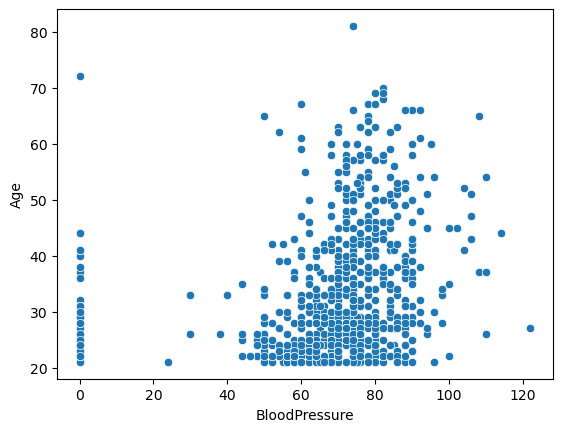

In [28]:
# Scatter plot: Fare vs Age
sns.scatterplot(x="BloodPressure", y="Age",data=df)
plt.show()

In [47]:
# Data Preprocessing: 
# 1. Impute missing values.

print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome_1  
0                     0.627   50       True  
1                     0.351   31      False  
2                     0.672   32       True  
3                     0.167   21      False  
4                     2.288   33       True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose          

In [48]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome_1                   0
dtype: int64


In [43]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Outcome'] = le.fit_transform(df['Outcome'])

In [44]:
# df = pd.get_dummies(df, columns=['Outcome'], drop_first=True)

In [50]:
import pandas as pd

# Check unique values in Outcome
print(df['Outcome_1'].unique())  # [0, 1]

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Outcome_1'], drop_first=True)

print(df_encoded.head())

[ True False]
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome_1_True  
0                     0.627   50            True  
1                     0.351   31           False  
2                     0.672   32            True  
3                     0.167   21           False  
4                     2.288   33            True  


In [ ]:
# Building Predictive Models: 
# 1. Split the preprocessed dataset into training and testing sets. 
# 2. Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation. 
# 3. Build predictive models using LightGBM and XGBoost algorithms. 
# 4. Train the models on the training set and evaluate their performance on the testing set. 
# 5. Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [55]:
!pip install lightgbm xgboost --quiet

In [56]:
import pandas as pd
import numpy as np

# Models
import lightgbm as lgb
import xgboost as xgb

# Preprocessing and model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# # Ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

In [57]:
X = df.drop('Outcome_1', axis=1)
y = df['Outcome_1']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (614, 8)
Test shape: (154, 8)


In [60]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

In [61]:
# Initialize LightGBM classifier
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)

# Train
lgb_model.fit(X_train, y_train)

# Predict
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_lgb, "LightGBM")

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [62]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

evaluate_model(y_test, y_pred_xgb, "XGBoost")


--- XGBoost Evaluation ---
Accuracy: 0.7337662337662337
Precision: 0.6274509803921569
Recall: 0.5925925925925926
F1-score: 0.6095238095238096

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.81      0.80       100
        True       0.63      0.59      0.61        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
 [[81 19]
 [22 32]]




In [63]:
# LightGBM CV
cv_lgb = cross_val_score(lgb_model, X_scaled, y, cv=5, scoring='accuracy')
print("LightGBM CV Accuracy:", cv_lgb.mean())

# XGBoost CV
cv_xgb = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring='accuracy')
print("XGBoost CV Accuracy:", cv_xgb.mean())

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [67]:
# Example: GridSearch for LightGBM
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_lgb = GridSearchCV(lgb_model, param_grid, cv=3, scoring='accuracy')
grid_lgb.fit(X_train, y_train)
print("Best LightGBM params:", grid_lgb.best_params_)
print("Best CV Accuracy:", grid_lgb.best_score_)

[LightGBM] [Info] Number of positive: 143, number of negative: 266
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349633 -> initscore=-0.620652
[LightGBM] [Info] Start training from score -0.620652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nicer plots
sns.set_style("whitegrid")

In [69]:
# Example predictions
y_pred_lgb = best_lgb.predict(X_test)  # LightGBM
y_pred_xgb = best_xgb.predict(X_test)  # XGBoost

NameError: name 'best_lgb' is not defined

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics dictionary
metrics = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lgb),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lgb),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lgb),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lgb),
        f1_score(y_test, y_pred_xgb)
    ]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.746753   0.653061  0.592593  0.621359
1   XGBoost  0.733766   0.627451  0.592593  0.609524


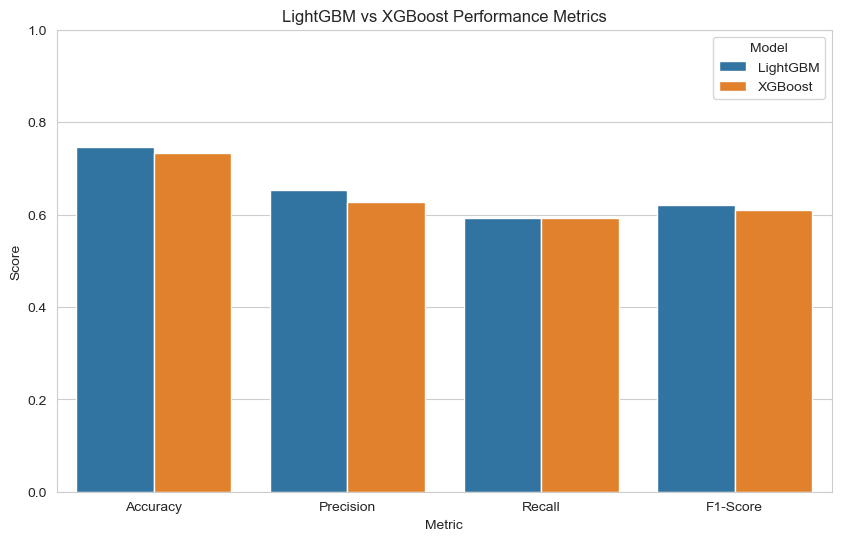

In [71]:
# Melt the dataframe for plotting
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10,6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted)
plt.title("LightGBM vs XGBoost Performance Metrics")
plt.ylim(0, 1)
plt.show()

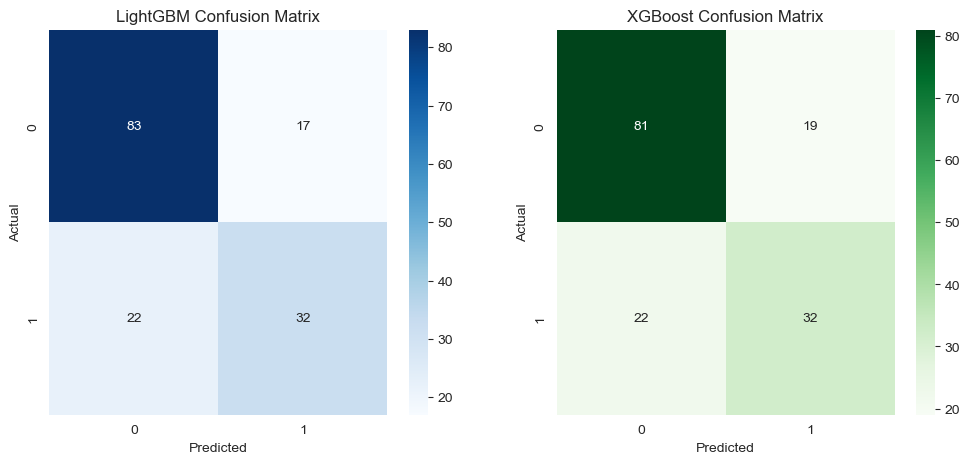

In [72]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("LightGBM Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title("XGBoost Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

In [ ]:

# Strengths & Weaknesses

# Model: LightGBM
# Strengths: Faster training, handles large data well
# Weaknesses: May overfit small datasets

# Model: XGBoost
# Strengths: Usually slightly higher accuracy on small/medium datasets
# Weaknesses: Slower training, more hyperparameters to tune